In [1]:
dataset_dir = "/kaggle/input/vc-test/picture_materials"

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
from skimage import img_as_ubyte, io

# 获取dataset_dir目录下的所有文件名
image_files = os.listdir(dataset_dir)

image_files

['Baboon.png',
 'Butterfly.png',
 'House.png',
 'Peppers.png',
 'Airplane.png',
 'Barbara.png',
 'Lena.png',
 'Boats.png']

In [3]:
# def block_no_expand(PIL_img):
#     image=np.array(PIL_img)
#     image_lab=cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
#     image_lab[:,:,-1]=np.interp(image_lab[:,:,-1],(0,255),(0,255/4))
#     image_rgb=cv2.cvtColor(image_lab,cv2.COLOR_HSV2RGB)
#     image_ht=Image.fromarray(image_rgb).convert("1")
#     image_ht=img_as_ubyte(image_ht)
#     return image_ht
def block_no_expand(PIL_img):
    image = np.array(PIL_img)
    # Scale the image intensity
    image = np.interp(image, (0, 255), (0, 255/4))
    # Convert the image to binary
    image_ht = Image.fromarray(image).convert("1")
    # Convert the binary image to 8-bit unsigned integer format
    image_ht = img_as_ubyte(image_ht)
    return image_ht

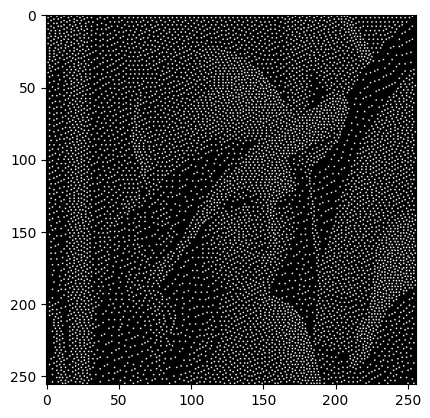

In [4]:
# Process the image
processed_img = block_no_expand(Image.open('/kaggle/input/vc-test/picture_materials/Lena.png').convert('L'))

# Display the image
plt.imshow(processed_img, cmap='gray')
plt.show()

In [5]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP, DES3, AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import time

# RSA加密和解密
def rsa_enc_dec(image):
    # 将图像转换为字节流
    start = time.perf_counter()

    # 生成RSA密钥
    key = RSA.generate(2048)
    cipher = PKCS1_OAEP.new(key)

    # 计算最大明文长度
    max_length = 128

    # 将图像分割成小块
    chunks = [image[i:i+max_length] for i in range(0, len(image), max_length)]

    # 加密
    encrypted_chunks = [cipher.encrypt(chunk) for chunk in chunks]
    enc_time = time.perf_counter() - start

    # 解密
    start = time.perf_counter()
    decrypted_chunks = [cipher.decrypt(chunk) for chunk in encrypted_chunks]
    dec_time = time.perf_counter() - start

    # 将解密后的小块重新组合成完整的图像
    decrypted = b''.join(decrypted_chunks)

    return enc_time, dec_time

def des3_enc_dec(image):
    # 将图像转换为字节流
    start = time.perf_counter()


    # 生成3DES密钥和初始化向量
    key = get_random_bytes(24)
    iv = get_random_bytes(8)

    # 创建一个新的DES3对象，使用CBC模式
    cipher_enc = DES3.new(key, DES3.MODE_CBC, iv)

    # 加密
    encrypted = cipher_enc.encrypt(pad(image, DES3.block_size))
    enc_time = time.perf_counter() - start

    # 创建一个新的DES3对象，使用CBC模式，用于解密
    cipher_dec = DES3.new(key, DES3.MODE_CBC, iv)

    # 解密
    start = time.perf_counter()
    decrypted = unpad(cipher_dec.decrypt(encrypted), DES3.block_size)
    dec_time = time.perf_counter() - start

    return enc_time, dec_time

# AES加密和解密
def aes_enc_dec(image):
    # 将图像转换为字节流
    start = time.perf_counter()

    # 生成AES密钥和初始化向量
    key = get_random_bytes(32)
    iv = get_random_bytes(16)

    # 创建一个新的AES对象，使用CBC模式
    cipher_enc = AES.new(key, AES.MODE_CBC, iv)

    # 加密
    start = time.perf_counter()
    encrypted = cipher_enc.encrypt(pad(image, AES.block_size))
    enc_time = time.perf_counter() - start

    # 创建一个新的AES对象，使用CBC模式，用于解密
    cipher_dec = AES.new(key, AES.MODE_CBC, iv)

    # 解密
    start = time.perf_counter()
    decrypted = unpad(cipher_dec.decrypt(encrypted), AES.block_size)
    dec_time = time.perf_counter() - start

    return enc_time, dec_time

def no_expand_enc_dec(img):
    # 加密
    start = time.perf_counter()
    #img = img.convert('RGB')
    encrypted = block_no_expand(img)
    enc_time = time.perf_counter() - start

    # 解密
    start = time.perf_counter()
    dec_time = time.perf_counter() - start

    return enc_time, dec_time

# 对每张图像进行加密和解密，并计算耗时
for image_file in image_files:
    # 打开图像文件，并转换为灰度图像
    img_gray = Image.open(os.path.join(dataset_dir, image_file)).convert('L')
    img = img_gray.tobytes()

    # 计算RSA加密和解密的耗时
    rsa_enc_time, rsa_dec_time = rsa_enc_dec(img)
    rsa_enc_time, rsa_dec_time = (round(rsa_enc_time * 1000, 2), round(rsa_dec_time * 1000, 2))  # 转换为毫秒并保留两位小数

    # 计算DES加密和解密的耗时
    des3_enc_time, des3_dec_time = des3_enc_dec(img)
    des3_enc_time, des3_dec_time = (round(des3_enc_time * 1000, 2), round(des3_dec_time * 1000, 2))  # 转换为毫秒并保留两位小数

    # 计算AES加密和解密的耗时
    aes_enc_time, aes_dec_time = aes_enc_dec(img)
    aes_enc_time, aes_dec_time = (round(aes_enc_time * 1000, 2), round(aes_dec_time * 1000, 2))  # 转换为毫秒并保留两位小数

    # 计算不扩展加密和解密的耗时
    no_expand_enc_time, no_expand_dec_time = no_expand_enc_dec(img_gray)
    no_expand_enc_time, no_expand_dec_time = (round(no_expand_enc_time * 1000, 2), round(no_expand_dec_time * 1000, 2))  # 转换为毫秒并保留两位小数

    print(f'Image: {image_file}')
    print(f'RSA encryption time: {rsa_enc_time} ms, decryption time: {rsa_dec_time} ms')
    print(f'3DES encryption time: {des3_enc_time} ms, decryption time: {des3_dec_time} ms')
    print(f'AES encryption time: {aes_enc_time} ms, decryption time: {aes_dec_time} ms')
    print(f'NE_VC encryption time: {no_expand_enc_time} ms, decryption time: {no_expand_dec_time} ms\n')

Image: Baboon.png
RSA encryption time: 1014.91 ms, decryption time: 1042.75 ms
3DES encryption time: 3.75 ms, decryption time: 2.97 ms
AES encryption time: 0.19 ms, decryption time: 0.19 ms
NE_VC encryption time: 1.51 ms, decryption time: 0.0 ms

Image: Butterfly.png
RSA encryption time: 1111.82 ms, decryption time: 1046.46 ms
3DES encryption time: 3.19 ms, decryption time: 2.98 ms
AES encryption time: 0.2 ms, decryption time: 0.2 ms
NE_VC encryption time: 1.44 ms, decryption time: 0.0 ms

Image: House.png
RSA encryption time: 2141.46 ms, decryption time: 1041.29 ms
3DES encryption time: 3.15 ms, decryption time: 2.92 ms
AES encryption time: 0.18 ms, decryption time: 0.2 ms
NE_VC encryption time: 1.45 ms, decryption time: 0.0 ms

Image: Peppers.png
RSA encryption time: 980.64 ms, decryption time: 1030.5 ms
3DES encryption time: 3.16 ms, decryption time: 2.92 ms
AES encryption time: 0.18 ms, decryption time: 0.19 ms
NE_VC encryption time: 1.47 ms, decryption time: 0.0 ms

Image: Airplan